In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.backends.backend_pdf as pdf_backend

def visualize_sequence_annotations(read_name, read, predicted_labels, chars_per_line=150):
    colors = {
        'random_s': 'black',
        'random_e': 'black',
        'p7': 'red',
        'i7':'blue',
        'RP2': 'green',
        'UMI': 'purple',
        'ACC': 'orange',
        'cDNA':'gray',
        'polyA': 'orange',
        'CBC': 'purple',
        'RP1': 'green',
        'i5': 'blue',
        'p5': 'red'
    }
    num_chunks = int(np.ceil(len(read) / chars_per_line))
    read_chunks = [read[i * chars_per_line: (i + 1) * chars_per_line] for i in range(num_chunks)]
    label_chunks = [predicted_labels[i * chars_per_line: (i + 1) * chars_per_line] for i in range(num_chunks)]

    fig, axs = plt.subplots(num_chunks + 1, 1, figsize=(15, 1.2 * (num_chunks + 1)))

    for ax in axs:
        ax.axis('off')

    # Display read name at the top of the visualization
    axs[0].text(0.5, 1, read_name, ha='center', va='center', fontsize=12, fontweight='bold')

    for ax_idx, (read_chunk, label_chunk) in enumerate(zip(read_chunks, label_chunks), start=1):
        ax = axs[ax_idx]

        start_idx = 0
        current_label = label_chunk[0]
        for idx, (base, label) in enumerate(zip(read_chunk, label_chunk)):
            ax.text(idx / chars_per_line, 1, base, ha='center', va='center', color=colors[label])

            if current_label != label or idx == len(read_chunk) - 1:
                label_position = start_idx / chars_per_line + (idx - start_idx) / (2 * chars_per_line)
                ax.text(label_position, 0.5, current_label, ha='center', va='center', color=colors[current_label],
                        fontsize=10)
                start_idx = idx
                current_label = label

    plt.subplots_adjust(hspace=0.1)  # Adjust the space between lines
    plt.tight_layout()
    plt.show()

def search_and_visualize():
    read_name = input("Enter the read name: ")
    if read_name in read_names:
        index = read_names.index(read_name)
        visualize_sequence_annotations(
            read_name, reads[index], label_binarizer.inverse_transform(predictions[index])
        )
    else:
        print("Read name not found.")

def save_visualizations_to_pdf(pdf_filename, n, reads, predictions, label_binarizer, read_names):
    with pdf_backend.PdfPages(pdf_filename) as pdf:
        for i in range(n):
            read_name = read_names[i]
            fig, ax = visualize_sequence_annotations(
                read_name, reads[i], label_binarizer.inverse_transform(predictions[i])
            )
            pdf.savefig(fig)
            plt.close()



In [8]:
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

model = load_model("/home/ayush.semwal2/ayush_hpc_projects/read_annotation/model18_10/model18.h5")
with open("/home/ayush.semwal2/ayush_hpc_projects/read_annotation/model18_10/label_binarizer.pkl", "rb") as f:
    label_binarizer = pickle.load(f)
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 64)          384       
                                                                 
 conv1d_6 (Conv1D)           (None, None, 256)         213248    
                                                                 
 batch_normalization_6 (Bat  (None, None, 256)         1024      
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, None, 256)         0         
                                                                 
 conv1d_7 (Conv1D)           (None, None, 256)         852224    
                                                           

/home/ayush.semwal2/.local/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [14]:
 with open("/home/ayush.semwal2/ayush_hpc_projects/LRAnnot/example/simulated/valid_reads/complex_model_inference/read_ends_pp_fa/reads.pkl", "rb") as f:
     reads = pickle.load(f)
with open("/home/ayush.semwal2/ayush_hpc_projects/LRAnnot/example/simulated/valid_reads/complex_model_inference/read_ends_pp_fa/read_names.pkl", "rb") as f:
    read_names = pickle.load(f)


In [5]:
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

def reverse_complement(seq):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    return "".join(complement[base] for base in reversed(seq))

nucleotide_to_id = {'A': 1, 'C': 2, 'G': 3, 'T': 4, 'N': 5}

def encode_sequence(read, nucleotide_to_id):
    return [nucleotide_to_id[n] for n in read]

def annotate_new_data(new_data, model):
    # Encode the sequence and predict the labels

    MAX_READ_LENGTH = max([len(seq) for seq in new_data])

    X_new_encoded = [encode_sequence(read, nucleotide_to_id) for read in new_data]
    X_new_padded = pad_sequences(X_new_encoded, padding='post')
    predictions = model.predict(X_new_padded)
    return predictions


In [15]:
predictions = annotate_new_data(reads[0:100], model)


4/4 [==============================] - 1s 21ms/step


Enter the read name:  sequence_41_2


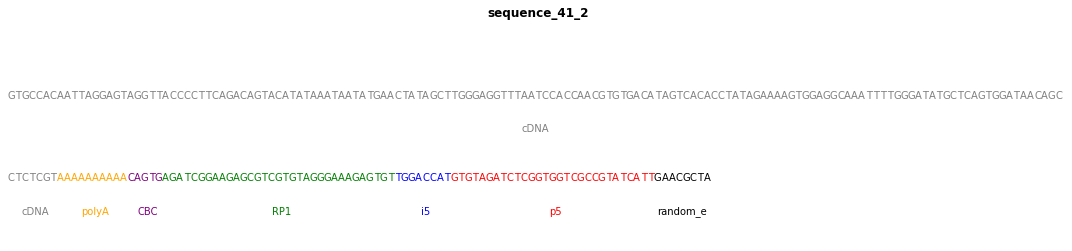

In [20]:
search_and_visualize()

In [16]:
read_names[0:100]

['sequence_1_1',
 'sequence_1_2',
 'sequence_2_1',
 'sequence_2_2',
 'sequence_3_1',
 'sequence_3_2',
 'sequence_4_1',
 'sequence_4_2',
 'sequence_5_1',
 'sequence_5_2',
 'sequence_6_1',
 'sequence_6_2',
 'sequence_7_1',
 'sequence_7_2',
 'sequence_8_1',
 'sequence_8_2',
 'sequence_9_1',
 'sequence_9_2',
 'sequence_10_1',
 'sequence_10_2',
 'sequence_11_1',
 'sequence_11_2',
 'sequence_12_1',
 'sequence_12_2',
 'sequence_13_1',
 'sequence_13_2',
 'sequence_14_1',
 'sequence_14_2',
 'sequence_15_1',
 'sequence_15_2',
 'sequence_16_1',
 'sequence_16_2',
 'sequence_17_1',
 'sequence_17_2',
 'sequence_18_1',
 'sequence_18_2',
 'sequence_19_1',
 'sequence_19_2',
 'sequence_20_1',
 'sequence_20_2',
 'sequence_21_1',
 'sequence_21_2',
 'sequence_22_1',
 'sequence_22_2',
 'sequence_23_1',
 'sequence_23_2',
 'sequence_24_1',
 'sequence_24_2',
 'sequence_25_1',
 'sequence_25_2',
 'sequence_26_1',
 'sequence_26_2',
 'sequence_27_1',
 'sequence_27_2',
 'sequence_28_1',
 'sequence_28_2',
 'sequence